In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

plt.style.use('ggplot')

In [6]:
la_crime = pd.read_csv('data/la_crime_squeaky.csv')
la_licenses = pd.read_csv('data/la_lic_squeaky.csv')

In [7]:
la_crime = la_crime.drop('Unnamed: 0',axis=1)
la_licenses = la_licenses.drop('Unnamed: 0',axis=1)

In [37]:
la_crime.head()

,Date Occurred,Area Name,Crime Code Description,Address,offense_category,year_occurred
0,11/03/2015,N Hollywood,BURGLARY FROM VEHICLE,11100 CAMARILLO ST,theft from vehicle,2015
1,10/30/2015,N Hollywood,BURGLARY FROM VEHICLE,11100 CHANDLER BL,theft from vehicle,2015
2,11/04/2015,N Hollywood,CRIMINAL THREATS - NO WEAPON DISPLAYED,7300 BAKMAN AV,pub disorder,2015
3,04/28/2015,N Hollywood,"RAPE, FORCIBLE",10700 LANDALE ST,drug-alc,2015
4,10/27/2015,N Hollywood,THEFT OF IDENTITY,11700 LEMAY ST,white collar,2015


In [8]:
la_crime['year_occurred'] = la_crime['Date Occurred'].str[-4:].astype(int)

In [17]:
la_crime['Date Occurred'] = pd.to_datetime(la_crime['Date Occurred'])

In [18]:
la_crime['month_year'] = la_crime['Date Occurred'].dt.to_period('M')

In [19]:
la_crime.head()

,Date Occurred,Area Name,Crime Code Description,Address,offense_category,year_occurred,month_year
0,2015-11-03,N Hollywood,BURGLARY FROM VEHICLE,11100 CAMARILLO ST,theft from vehicle,2015,2015-11
1,2015-10-30,N Hollywood,BURGLARY FROM VEHICLE,11100 CHANDLER BL,theft from vehicle,2015,2015-10
2,2015-11-04,N Hollywood,CRIMINAL THREATS - NO WEAPON DISPLAYED,7300 BAKMAN AV,pub disorder,2015,2015-11
3,2015-04-28,N Hollywood,"RAPE, FORCIBLE",10700 LANDALE ST,drug-alc,2015,2015-04
4,2015-10-27,N Hollywood,THEFT OF IDENTITY,11700 LEMAY ST,white collar,2015,2015-10


In [20]:
la_crime['month_year'] = la_crime['month_year'].astype(str)
la_crime['month_year'] = pd.to_datetime(la_crime['month_year'], format='%Y-%m')


In [163]:
la_crime.head()

,Area Name,Crime Code Description,Address,offense_category,month_year
0,N Hollywood,BURGLARY FROM VEHICLE,11100 CAMARILLO ST,theft from vehicle,2015-11-01
1,N Hollywood,BURGLARY FROM VEHICLE,11100 CHANDLER BL,theft from vehicle,2015-10-01
2,N Hollywood,CRIMINAL THREATS - NO WEAPON DISPLAYED,7300 BAKMAN AV,pub disorder,2015-11-01
3,N Hollywood,"RAPE, FORCIBLE",10700 LANDALE ST,drug-alc,2015-04-01
4,N Hollywood,THEFT OF IDENTITY,11700 LEMAY ST,white collar,2015-10-01


In [23]:
la_crime = la_crime.drop(['year_occurred','Date Occurred'],axis=1)

In [162]:
x = la_crime['month_year'].sort_values()
x = x.unique()
x

array(['2010-01-01T00:00:00.000000000', '2010-02-01T00:00:00.000000000',
       '2010-03-01T00:00:00.000000000', '2010-04-01T00:00:00.000000000',
       '2010-05-01T00:00:00.000000000', '2010-06-01T00:00:00.000000000',
       '2010-07-01T00:00:00.000000000', '2010-08-01T00:00:00.000000000',
       '2010-09-01T00:00:00.000000000', '2010-10-01T00:00:00.000000000',
       '2010-11-01T00:00:00.000000000', '2010-12-01T00:00:00.000000000',
       '2011-01-01T00:00:00.000000000', '2011-02-01T00:00:00.000000000',
       '2011-03-01T00:00:00.000000000', '2011-04-01T00:00:00.000000000',
       '2011-05-01T00:00:00.000000000', '2011-06-01T00:00:00.000000000',
       '2011-07-01T00:00:00.000000000', '2011-08-01T00:00:00.000000000',
       '2011-09-01T00:00:00.000000000', '2011-10-01T00:00:00.000000000',
       '2011-11-01T00:00:00.000000000', '2011-12-01T00:00:00.000000000',
       '2012-01-01T00:00:00.000000000', '2012-02-01T00:00:00.000000000',
       '2012-03-01T00:00:00.000000000', '2012-04-01

In [24]:
la_crime['offense_category'].unique()

array(['theft from vehicle', 'pub disorder', 'drug-alc', 'white collar',
       'auto-theft', 'larceny', 'other crimes against persons',
       'burglary', 'other', 'agg assault', 'robbery', 'sexual assault',
       'arson', 'child', 'murder'], dtype=object)

In [25]:
la_theft_frm_veh = la_crime.loc[la_crime['offense_category'] == 'theft from vehicle']
la_pub_disorder = la_crime.loc[la_crime['offense_category'] == 'pub disorder']
la_drug_alc = la_crime.loc[la_crime['offense_category'] == 'drug-alc']
la_white_collar = la_crime.loc[la_crime['offense_category'] == 'white collar']
la_auto_theft = la_crime.loc[la_crime['offense_category'] == 'auto-theft']
la_larceny = la_crime.loc[la_crime['offense_category'] == 'larceny']
la_other_crimes_agnst_per = la_crime.loc[la_crime['offense_category'] == 'other crimes against persons']
la_burglary = la_crime.loc[la_crime['offense_category'] == 'burglary']
la_other = la_crime.loc[la_crime['offense_category'] == 'other']
la_agg_assault = la_crime.loc[la_crime['offense_category'] == 'agg assault']
la_robbery = la_crime.loc[la_crime['offense_category'] == 'robbery']
la_sex_asslt = la_crime.loc[la_crime['offense_category'] == 'sexual assault']
la_arson = la_crime.loc[la_crime['offense_category'] == 'arson']
la_child = la_crime.loc[la_crime['offense_category'] == 'child']
la_murder = la_crime.loc[la_crime['offense_category'] == 'murder']

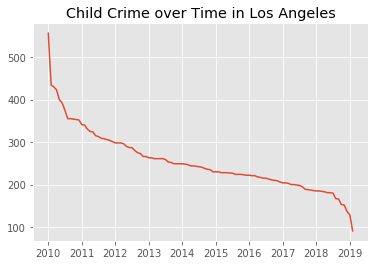

In [164]:
plt.title('Child Crime over Time in Los Angeles')
plt.plot(x,la_child['month_year'].value_counts())

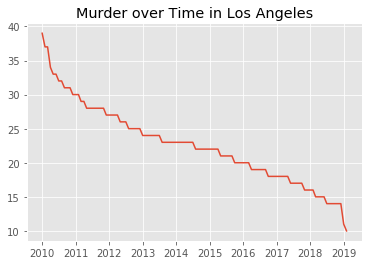

In [165]:
plt.title('Murder over Time in Los Angeles')
plt.plot(x,la_murder['month_year'].value_counts())

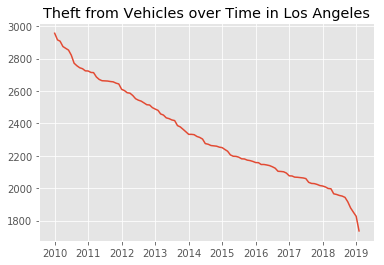

In [166]:
plt.title('Theft from Vehicles over Time in Los Angeles')
plt.plot(x,la_theft_frm_veh['month_year'].value_counts())

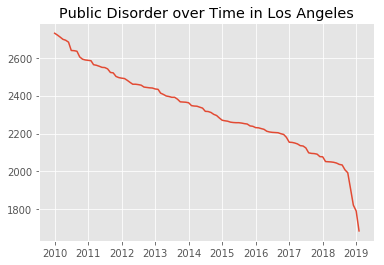

In [167]:
plt.title('Public Disorder over Time in Los Angeles')
plt.plot(x,la_pub_disorder['month_year'].value_counts())

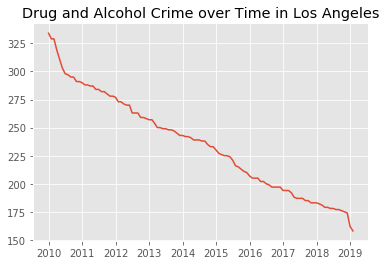

In [168]:
plt.title('Drug and Alcohol Crime over Time in Los Angeles')
plt.plot(x,la_drug_alc['month_year'].value_counts())

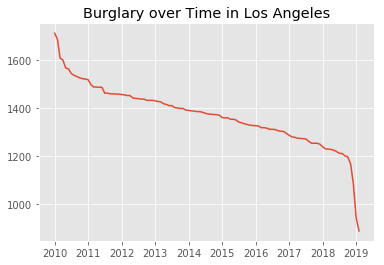

In [169]:
plt.title('Burglary over Time in Los Angeles')
plt.plot(x,la_burglary['month_year'].value_counts())

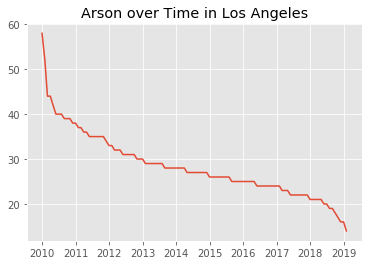

In [170]:
plt.title('Arson over Time in Los Angeles')
plt.plot(x,la_arson['month_year'].value_counts())

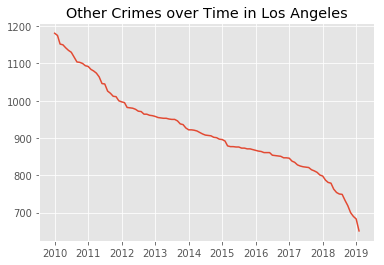

In [171]:
plt.title('Other Crimes over Time in Los Angeles')
plt.plot(x,la_other['month_year'].value_counts())

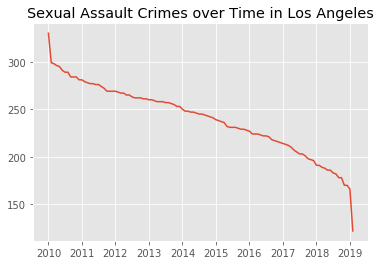

In [172]:
plt.title('Sexual Assault Crimes over Time in Los Angeles')
plt.plot(x,la_sex_asslt['month_year'].value_counts())

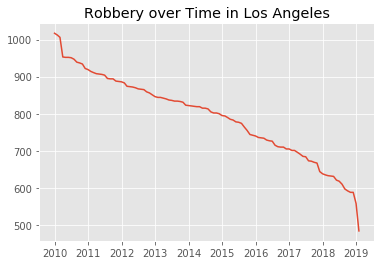

In [173]:
plt.title('Robbery over Time in Los Angeles')
plt.plot(x,la_robbery['month_year'].value_counts())

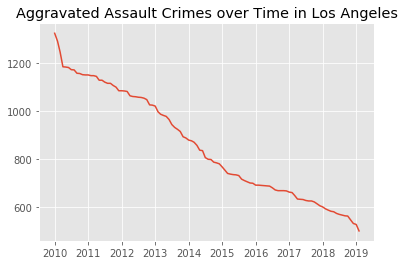

In [174]:
plt.title('Aggravated Assault Crimes over Time in Los Angeles')
plt.plot(x,la_agg_assault['month_year'].value_counts())

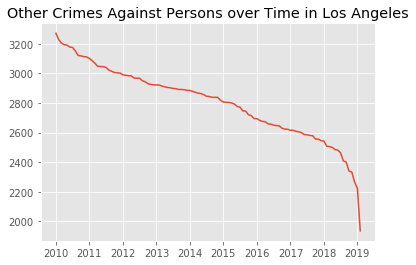

In [160]:
plt.title('Other Crimes Against Persons over Time in Los Angeles')
plt.plot(x,la_other_crimes_agnst_per['month_year'].value_counts())

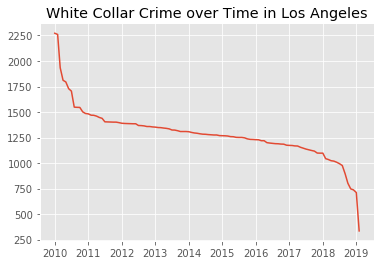

In [161]:
plt.title('White Collar Crime over Time in Los Angeles')
plt.plot(x,la_white_collar['month_year'].value_counts())

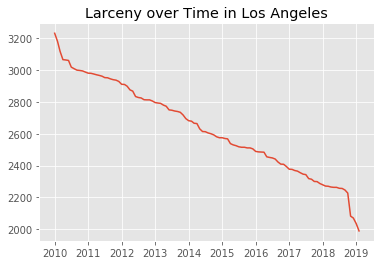

In [175]:
plt.title('Larceny over Time in Los Angeles')
plt.plot(x,la_larceny['month_year'].value_counts())

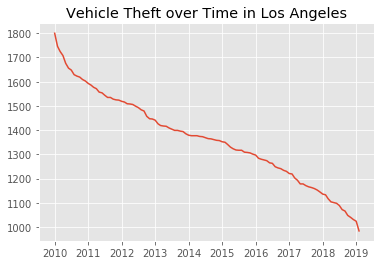

In [176]:
plt.title('Vehicle Theft over Time in Los Angeles')
plt.plot(x,la_auto_theft['month_year'].value_counts())

# of these graphs, lets pick out the 4 that we think are most interesting:

drug and alc
white collar crime
Public Disorder
Theft from Vehicles

Since crime rates seem to be falling across the board, lets look at the percentage of total crime each category accounts for.

In [42]:
la_drug_alc.head()

,Area Name,Crime Code Description,Address,offense_category,month_year
3,N Hollywood,"RAPE, FORCIBLE",10700 LANDALE ST,drug-alc,2015-04-01
36,N Hollywood,INTIMATE PARTNER - AGGRAVATED ASSAULT,6500 SIMPSON AV,drug-alc,2015-11-01
56,N Hollywood,CRIMINAL THREATS - NO WEAPON DISPLAYED,4200 COLFAX AV,drug-alc,2015-11-01
70,N Hollywood,CRIMINAL THREATS - NO WEAPON DISPLAYED,6700 TROOST AV,drug-alc,2015-11-01
163,N Hollywood,BATTERY - SIMPLE ASSAULT,6100 SAINT CLAIR AV,drug-alc,2015-11-01


In [43]:
la_white_collar.head()

,Area Name,Crime Code Description,Address,offense_category,month_year
4,N Hollywood,THEFT OF IDENTITY,11700 LEMAY ST,white collar,2015-10-01
14,N Hollywood,THEFT OF IDENTITY,4500 COLDWATER CANYON AV,white collar,2015-10-01
26,N Hollywood,THEFT OF IDENTITY,5900 CARPENTER AV,white collar,2015-10-01
31,N Hollywood,THEFT OF IDENTITY,7100 BELLAIRE AV,white collar,2015-09-01
35,N Hollywood,THEFT OF IDENTITY,5600 FARMDALE AV,white collar,2015-05-01


In [44]:
la_pub_disorder.head()

,Area Name,Crime Code Description,Address,offense_category,month_year
2,N Hollywood,CRIMINAL THREATS - NO WEAPON DISPLAYED,7300 BAKMAN AV,pub disorder,2015-11-01
8,N Hollywood,VANDALISM - MISDEAMEANOR ($399 OR UNDER),6200 BEEMAN AV,pub disorder,2015-11-01
13,N Hollywood,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",10500 RIVERSIDE DR,pub disorder,2015-11-01
15,N Hollywood,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",5200 COLFAX AV,pub disorder,2015-11-01
30,N Hollywood,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",CLEON ST,pub disorder,2015-11-01


In [45]:
la_theft_frm_veh.head()

,Area Name,Crime Code Description,Address,offense_category,month_year
0,N Hollywood,BURGLARY FROM VEHICLE,11100 CAMARILLO ST,theft from vehicle,2015-11-01
1,N Hollywood,BURGLARY FROM VEHICLE,11100 CHANDLER BL,theft from vehicle,2015-10-01
7,N Hollywood,THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER),13100 WELBY WY,theft from vehicle,2015-10-01
24,N Hollywood,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),5400 FAIR AV,theft from vehicle,2015-11-01
28,N Hollywood,THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER),6300 FOREST LAWN DR,theft from vehicle,2015-11-01


In [54]:
la_crime_counts = la_crime.groupby(['month_year']).count()

In [56]:
la_crime_counts.head()

,Area Name,Crime Code Description,Address,offense_category
month_year,,,,
2010-01-01,19352,19352,19352,19352
2010-02-01,15997,15997,15997,15997
2010-03-01,18105,18105,18105,18105
2010-04-01,17740,17740,17740,17740
2010-05-01,17696,17696,17696,17696


In [60]:
la_crime_counts['count'] = la_crime_counts['Area Name']
la_crime_counts = la_crime_counts.drop(['Area Name','Crime Code Description','Address','offense_category'],axis=1)

In [55]:
la_drug_alc_counts = la_drug_alc.groupby(['month_year']).count()

In [62]:
la_drug_alc_counts['count'] = la_drug_alc_counts['Area Name']
la_drug_alc_counts = la_drug_alc_counts.drop(['Area Name','Crime Code Description','Address','offense_category'],axis=1)

In [63]:
la_crime_counts.head()

,count
month_year,
2010-01-01,19352
2010-02-01,15997
2010-03-01,18105
2010-04-01,17740
2010-05-01,17696


In [65]:
la_drug_alc_counts.head()

,count
month_year,
2010-01-01,178
2010-02-01,174
2010-03-01,183
2010-04-01,162
2010-05-01,213


In [66]:
len(la_drug_alc_counts)

110

In [67]:
len(la_crime_counts)

110

# Drug and Alcohol

In [73]:
la_drug_alc_prop = la_crime_counts.merge(la_drug_alc_counts, how='outer',left_index=True,right_index=True)

In [77]:
la_drug_alc_prop.head()

,count_x,count_y
month_year,,
2010-01-01,19352,178
2010-02-01,15997,174
2010-03-01,18105,183
2010-04-01,17740,162
2010-05-01,17696,213


In [82]:
len(la_drug_alc_prop)

110

In [78]:
la_drug_alc_prop['percentage'] = (la_drug_alc_prop['count_y'] / la_drug_alc_prop['count_x'])*100
la_drug_alc_prop.head()

,count_x,count_y,percentage
month_year,,,
2010-01-01,19352,178,0.919802
2010-02-01,15997,174,1.087704
2010-03-01,18105,183,1.010771
2010-04-01,17740,162,0.913191
2010-05-01,17696,213,1.203662


In [81]:
la_drug_alc_prop_legalized = la_drug_alc_prop.tail(14)

In [83]:
la_drug_alc_prop_non_legal = la_drug_alc_prop.head(96)
la_drug_alc_prop_non_legal.tail()

,count_x,count_y,percentage
month_year,,,
2017-08-01,19603,295,1.504872
2017-09-01,19315,291,1.506601
2017-10-01,20281,282,1.390464
2017-11-01,18883,270,1.429858
2017-12-01,18890,238,1.259926


In [84]:
la_drug_alc_prop_non_legal.describe()

,count_x,count_y,percentage
count,96.000000,96.000000,96.000000
mean,17355.572917,230.187500,1.322679
std,1347.227693,41.308165,0.186973
min,13658.000000,158.000000,0.913191
25%,16412.000000,194.000000,1.157600
50%,17226.000000,228.500000,1.331219
75%,18270.500000,259.000000,1.479161
max,20281.000000,329.000000,1.751705


In [85]:
la_drug_alc_prop_legalized.describe()

,count_x,count_y,percentage
count,14.000000,14.000000,14.000000
mean,18202.142857,273.857143,1.501666
std,1937.021578,37.989588,0.091008
min,12088.000000,179.000000,1.348374
25%,18183.250000,260.500000,1.453178
50%,18881.000000,276.500000,1.494561
75%,19126.000000,289.500000,1.524534
max,19730.000000,334.000000,1.692854


(array([ 2.,  1.,  2.,  1.,  6., 15.,  6.,  2.,  7.,  7.,  4., 13.,  5.,
         3., 11.,  5.,  1.,  2.,  1.,  2.]),
 array([0.91319053, 0.95511624, 0.99704194, 1.03896765, 1.08089336,
        1.12281907, 1.16474477, 1.20667048, 1.24859619, 1.2905219 ,
        1.3324476 , 1.37437331, 1.41629902, 1.45822473, 1.50015043,
        1.54207614, 1.58400185, 1.62592756, 1.66785326, 1.70977897,
        1.75170468]),
 <a list of 20 Patch objects>)

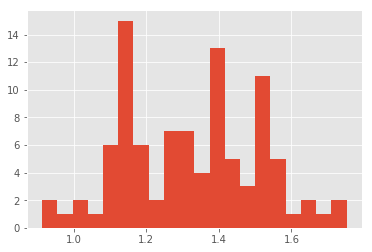

In [156]:
plt.hist(la_drug_alc_prop_non_legal['percentage'],bins=20)
# distribution of drug-alc percentages from before legalization

# White Collar

In [98]:
la_white_collar_counts = la_white_collar.groupby(['month_year']).count()

In [99]:
la_white_collar_counts['count'] = la_white_collar_counts['Area Name']
la_white_collar_counts = la_white_collar_counts.drop(['Area Name','Crime Code Description','Address','offense_category'],axis=1)
la_white_collar_counts.head()

,count
month_year,
2010-01-01,2272
2010-02-01,1252
2010-03-01,1354
2010-04-01,1386
2010-05-01,1137


In [102]:
la_white_collar_prop = la_crime_counts.merge(la_white_collar_counts, how='outer',left_index=True,right_index=True)
la_white_collar_prop['percentage'] = (la_white_collar_prop['count_y'] / la_white_collar_prop['count_x'])*100
la_white_collar_prop.head()

,count_x,count_y,percentage
month_year,,,
2010-01-01,19352,2272,11.740389
2010-02-01,15997,1252,7.826467
2010-03-01,18105,1354,7.478597
2010-04-01,17740,1386,7.812852
2010-05-01,17696,1137,6.425181


In [105]:
la_white_collar_prop_legal = la_white_collar_prop.tail(14)
la_white_collar_prop_legal.describe()
# percentage or white collar crime after legalization

,count_x,count_y,percentage
count,14.000000,14.000000,14.000000
mean,18202.142857,900.214286,4.885162
std,1937.021578,219.158593,0.948592
min,12088.000000,335.000000,2.771343
25%,18183.250000,760.750000,4.190482
50%,18881.000000,985.000000,5.050407
75%,19126.000000,1022.000000,5.457251
max,19730.000000,1190.000000,6.243442


In [107]:
la_white_collar_prop_non_legal = la_white_collar_prop.head(96)
la_white_collar_prop_non_legal.describe()
# percentage or white collar crime before legalization

,count_x,count_y,percentage
count,96.000000,96.000000,96.000000
mean,17355.572917,1344.791667,7.784046
std,1347.227693,205.844751,1.225484
min,13658.000000,1035.000000,5.413934
25%,16412.000000,1230.500000,7.091053
50%,17226.000000,1308.000000,7.609016
75%,18270.500000,1391.500000,8.304907
max,20281.000000,2272.000000,12.580017


(array([ 2.,  4.,  3.,  9., 13., 16., 13., 10., 10.,  6.,  3.,  1.,  1.,
         0.,  0.,  3.,  0.,  1.,  0.,  1.]),
 array([ 5.41393422,  5.77223835,  6.13054247,  6.4888466 ,  6.84715072,
         7.20545484,  7.56375897,  7.92206309,  8.28036721,  8.63867134,
         8.99697546,  9.35527959,  9.71358371, 10.07188783, 10.43019196,
        10.78849608, 11.1468002 , 11.50510433, 11.86340845, 12.22171258,
        12.5800167 ]),
 <a list of 20 Patch objects>)

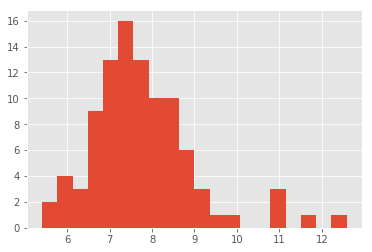

In [155]:
# distribution of percentages of white collar crime b4 legalization
plt.hist(la_white_collar_prop_non_legal['percentage'],bins=20)

# Public Disorder

In [111]:
la_pub_disorder_counts = la_pub_disorder.groupby(['month_year']).count()
la_pub_disorder_counts.head()

,Area Name,Crime Code Description,Address,offense_category
month_year,,,,
2010-01-01,2339,2339,2339,2339
2010-02-01,2205,2205,2205,2205
2010-03-01,2588,2588,2588,2588
2010-04-01,2435,2435,2435,2435
2010-05-01,2391,2391,2391,2391


In [112]:
la_pub_disorder_counts['count'] = la_pub_disorder_counts['Area Name']
la_pub_disorder_counts = la_pub_disorder_counts.drop(['Area Name','Crime Code Description','Address','offense_category'],axis=1)
la_pub_disorder_counts.head()

,count
month_year,
2010-01-01,2339
2010-02-01,2205
2010-03-01,2588
2010-04-01,2435
2010-05-01,2391


In [127]:
la_pub_disorder_prop = la_crime_counts.merge(la_pub_disorder_counts, how='outer',left_index=True,right_index=True)
la_pub_disorder_prop['percentage'] = (la_pub_disorder_prop['count_y'] / la_pub_disorder_prop['count_x'])*100
la_pub_disorder_prop.head()

,count_x,count_y,percentage
month_year,,,
2010-01-01,19352,2339,12.086606
2010-02-01,15997,2205,13.783834
2010-03-01,18105,2588,14.294394
2010-04-01,17740,2435,13.726043
2010-05-01,17696,2391,13.511528


In [128]:
la_pub_disorder_prop_legalized = la_pub_disorder_prop.tail(14)
la_pub_disorder_prop_non_legal = la_pub_disorder_prop.head(96)

In [129]:
la_pub_disorder_prop_legalized.describe()

,count_x,count_y,percentage
count,14.000000,14.000000,14.000000
mean,18202.142857,2457.142857,13.505271
std,1937.021578,261.003347,0.265536
min,12088.000000,1686.000000,13.025556
25%,18183.250000,2396.000000,13.340445
50%,18881.000000,2548.000000,13.548680
75%,19126.000000,2601.000000,13.685523
max,19730.000000,2697.000000,13.947717


In [130]:
la_pub_disorder_prop_non_legal.describe()

,count_x,count_y,percentage
count,96.000000,96.000000,96.000000
mean,17355.572917,2300.552083,13.255937
std,1347.227693,198.412217,0.511698
min,13658.000000,1791.000000,12.086606
25%,16412.000000,2153.750000,12.929390
50%,17226.000000,2276.000000,13.290032
75%,18270.500000,2443.500000,13.663948
max,20281.000000,2729.000000,14.294394


(array([ 2.,  2.,  3.,  3.,  4.,  0.,  6.,  6.,  6., 12.,  5., 12.,  6.,
         4.,  8.,  4.,  6.,  2.,  4.,  1.]),
 array([12.08660604, 12.19699542, 12.30738481, 12.4177742 , 12.52816359,
        12.63855298, 12.74894237, 12.85933176, 12.96972115, 13.08011054,
        13.19049992, 13.30088931, 13.4112787 , 13.52166809, 13.63205748,
        13.74244687, 13.85283626, 13.96322565, 14.07361504, 14.18400442,
        14.29439381]),
 <a list of 20 Patch objects>)

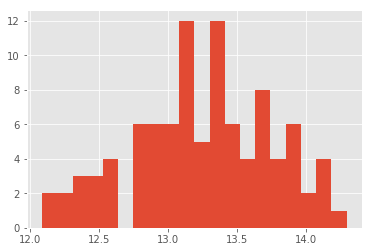

In [154]:
# distribution of percentages of pub disorder crimes b4 legalization
plt.hist(la_pub_disorder_prop_non_legal['percentage'],bins=20)

# Theft from Vehicles

In [124]:
la_theft_frm_veh_counts = la_theft_frm_veh.groupby(['month_year']).count()

In [125]:
la_theft_frm_veh_counts['count'] = la_theft_frm_veh_counts['Area Name']
la_theft_frm_veh_counts = la_theft_frm_veh_counts.drop(['Area Name','Crime Code Description','Address','offense_category'],axis=1)


In [126]:
la_theft_frm_veh_counts.head()

,count
month_year,
2010-01-01,2515
2010-02-01,2250
2010-03-01,2458
2010-04-01,2378
2010-05-01,2319


In [131]:
la_theft_frm_veh_prop = la_crime_counts.merge(la_theft_frm_veh_counts, how='outer',left_index=True,right_index=True)
la_theft_frm_veh_prop['percentage'] = (la_theft_frm_veh_prop['count_y'] / la_theft_frm_veh_prop['count_x'])*100
la_theft_frm_veh_prop.head()

,count_x,count_y,percentage
month_year,,,
2010-01-01,19352,2515,12.996073
2010-02-01,15997,2250,14.065137
2010-03-01,18105,2458,13.576360
2010-04-01,17740,2378,13.404735
2010-05-01,17696,2319,13.104656


In [137]:
la_theft_frm_veh_prop_legalized = la_theft_frm_veh_prop.tail(14)
la_theft_frm_veh_prop_legalized.describe()

,count_x,count_y,percentage
count,14.000000,14.000000,14.000000
mean,18202.142857,2648.714286,14.578433
std,1937.021578,257.814313,0.567513
min,12088.000000,1826.000000,13.902235
25%,18183.250000,2623.000000,14.142487
50%,18881.000000,2718.500000,14.438008
75%,19126.000000,2752.000000,15.064608
max,19730.000000,2907.000000,15.814384


In [136]:
la_theft_frm_veh_prop_non_legal = la_theft_frm_veh_prop.head(96)
la_theft_frm_veh_prop_non_legal.describe()

,count_x,count_y,percentage
count,96.000000,96.000000,96.000000
mean,17355.572917,2288.135417,13.165030
std,1347.227693,266.895786,0.864279
min,13658.000000,1736.000000,11.438665
25%,16412.000000,2075.750000,12.474862
50%,17226.000000,2244.000000,13.177984
75%,18270.500000,2482.000000,13.665712
max,20281.000000,2956.000000,15.293083


(array([ 2.,  3.,  5.,  7.,  3.,  6.,  6.,  8.,  8.,  5.,  8., 18.,  1.,
         5.,  2.,  2.,  2.,  1.,  2.,  2.]),
 array([11.43866488, 11.63138578, 11.82410669, 12.01682759, 12.20954849,
        12.40226939, 12.5949903 , 12.7877112 , 12.9804321 , 13.173153  ,
        13.36587391, 13.55859481, 13.75131571, 13.94403661, 14.13675752,
        14.32947842, 14.52219932, 14.71492022, 14.90764113, 15.10036203,
        15.29308293]),
 <a list of 20 Patch objects>)

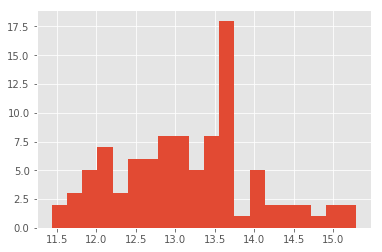

In [157]:
# distribution of percentages of theft from vehicle crimes b4 legalization
plt.hist(la_theft_frm_veh_prop_non_legal['percentage'],bins=20)

# Robbery

In [138]:
la_robbery_counts = la_robbery.groupby(['month_year']).count()


In [139]:
la_robbery_counts['count'] = la_robbery_counts['Area Name']
la_robbery_counts = la_robbery_counts.drop(['Area Name','Crime Code Description','Address','offense_category'],axis=1)


In [141]:
la_robbery_counts.head()

,count
month_year,
2010-01-01,1012
2010-02-01,872
2010-03-01,888
2010-04-01,934
2010-05-01,919


In [145]:
la_robbery_prop = la_crime_counts.merge(la_robbery_counts, how='outer',left_index=True,right_index=True)
la_robbery_prop.head()

,count_x,count_y
month_year,,
2010-01-01,19352,1012
2010-02-01,15997,872
2010-03-01,18105,888
2010-04-01,17740,934
2010-05-01,17696,919


In [147]:
la_robbery_prop['percentages'] = (la_robbery_prop['count_y'] / la_robbery_prop['count_x']) * 100
la_robbery_prop.head()

,count_x,count_y,percentages
month_year,,,
2010-01-01,19352,1012,5.229434
2010-02-01,15997,872,5.451022
2010-03-01,18105,888,4.904722
2010-04-01,17740,934,5.264938
2010-05-01,17696,919,5.193264


In [148]:
la_robbery_prop_legalized = la_robbery_prop.tail(14)
la_robbery_prop_non_legal = la_robbery_prop.head(96)

In [151]:
la_robbery_prop_legalized.describe()

,count_x,count_y,percentages
count,14.000000,14.000000,14.000000
mean,18202.142857,830.285714,4.570576
std,1937.021578,85.317893,0.219030
min,12088.000000,592.000000,4.258709
25%,18183.250000,806.250000,4.374682
50%,18881.000000,831.500000,4.577727
75%,19126.000000,867.250000,4.739111
max,19730.000000,939.000000,4.916055


In [152]:
la_robbery_prop_non_legal.describe()

,count_x,count_y,percentages
count,96.000000,96.00000,96.000000
mean,17355.572917,786.62500,4.520856
std,1347.227693,113.55854,0.464408
min,13658.000000,484.00000,3.543711
25%,16412.000000,704.00000,4.151653
50%,17226.000000,801.00000,4.454372
75%,18270.500000,873.25000,4.906870
max,20281.000000,1017.00000,5.451022


(array([ 1.,  0.,  5.,  2.,  8.,  3., 10.,  7.,  7.,  8.,  4.,  8.,  3.,
         3.,  6.,  5.,  6.,  3.,  6.,  1.]),
 array([3.54371065, 3.63907622, 3.73444179, 3.82980736, 3.92517293,
        4.0205385 , 4.11590407, 4.21126964, 4.30663521, 4.40200079,
        4.49736636, 4.59273193, 4.6880975 , 4.78346307, 4.87882864,
        4.97419421, 5.06955978, 5.16492535, 5.26029092, 5.3556565 ,
        5.45102207]),
 <a list of 20 Patch objects>)

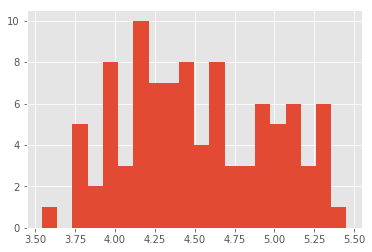

In [159]:
# distribution of percentages of robbery crimes b4 legalization
plt.hist(la_robbery_prop_non_legal['percentages'],bins=20)